In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib import colors
import numpy as np
import datetime as dt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os, ssl
import glob
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
getattr(ssl, '_create_unverified_context', None)):
    ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
path=r'C://Users/c_ull/data-projects/voters-april-24-2022/revamped_election_maps/'
all_files = glob.glob(path+"*_revamped.csv")
cols=['registration_date','state_house','state_senate','us_congress','party_code']
full_revamped=[]
for file in all_files:
    df = pd.read_csv(file,usecols=cols)
    #usecols=['id_number','first_name','last_name','middle_name','last_vote_date','dob','party_code','registration_date','voter_status','municipality','county_1',]
    #df = df[['id_number','dob','registration_date','voter_status','party_code','county_1','municipality','gen_prim_2020_vote_method',"gen_prim_2020_party",'gen_elect_2020_vote_method',"gen_elect_2020_party",
    #         'muni_prima_2021_vote_method',"muni_prim_2021_party",'muni_elect_2020_vote_method',"muni_elect_2020_party"]]
    full_revamped.append(df)
df22=pd.concat(full_revamped,sort=False)

In [3]:
path=r'C://Users/c_ull/Desktop/revamped_election_maps_may_primary_2021/'
all_files = glob.glob(path+"*_revamped.csv")
cols=['registration_date','state_house','state_senate','us_congress','party_code']
full_revamped=[]
for file in all_files:
    df = pd.read_csv(file,usecols=cols)
    #usecols=['id_number','first_name','last_name','middle_name','last_vote_date','dob','party_code','registration_date','voter_status','municipality','county_1',]
    #df = df[['id_number','dob','registration_date','voter_status','party_code','county_1','municipality','gen_prim_2020_vote_method',"gen_prim_2020_party",'gen_elect_2020_vote_method',"gen_elect_2020_party",
    #         'muni_prima_2021_vote_method',"muni_prim_2021_party",'muni_elect_2020_vote_method',"muni_elect_2020_party"]]
    full_revamped.append(df)
df21=pd.concat(full_revamped,sort=False)

In [4]:
t_V_22=df22.groupby('state_house').registration_date.count().to_frame().reset_index().rename(columns={"registration_date":'voter_22','state_house':'district'})
r_V_22=df22[df22.party_code=='R'].groupby('state_house').registration_date.count().to_frame().reset_index().rename(columns={"registration_date":'Rvoter_22','state_house':'district'})
d_V_22=df22[df22.party_code=='D'].groupby('state_house').registration_date.count().to_frame().reset_index().rename(columns={"registration_date":'Dvoter_22','state_house':'district'})
sth22=pd.merge(t_V_22,r_V_22,how="left")
sth22=pd.merge(sth22,d_V_22,how="left")
sth22['d_type']="State House"
t_V_21=df21.groupby('state_house').registration_date.count().to_frame().reset_index().rename(columns={"registration_date":'voter_21','state_house':'district'})
r_V_21=df21[df21.party_code=='R'].groupby('state_house').registration_date.count().to_frame().reset_index().rename(columns={"registration_date":'Rvoter_21','state_house':'district'})
d_V_21=df21[df21.party_code=='D'].groupby('state_house').registration_date.count().to_frame().reset_index().rename(columns={"registration_date":'Dvoter_21','state_house':'district'})
sth21=pd.merge(t_V_21,r_V_21,how="left")
sth21=pd.merge(sth21,d_V_21,how="left")
sth21['d_type']="State House"
t_V_21=df21.groupby('state_senate').registration_date.count().to_frame().reset_index().rename(columns={"registration_date":'voter_21','state_senate':'district'})
r_V_21=df21[df21.party_code=='R'].groupby('state_senate').registration_date.count().to_frame().reset_index().rename(columns={"registration_date":'Rvoter_21','state_senate':'district'})
d_V_21=df21[df21.party_code=='D'].groupby('state_senate').registration_date.count().to_frame().reset_index().rename(columns={"registration_date":'Dvoter_21','state_senate':'district'})
sts21=pd.merge(t_V_21,r_V_21,how="left")
sts21=pd.merge(sts21,d_V_21,how="left")
sts21['d_type']="State Senate"
t_V_22=df22.groupby('state_senate').registration_date.count().to_frame().reset_index().rename(columns={"registration_date":'voter_22','state_senate':'district'})
r_V_22=df22[df22.party_code=='R'].groupby('state_senate').registration_date.count().to_frame().reset_index().rename(columns={"registration_date":'Rvoter_22','state_senate':'district'})
d_V_22=df22[df22.party_code=='D'].groupby('state_senate').registration_date.count().to_frame().reset_index().rename(columns={"registration_date":'Dvoter_22','state_senate':'district'})
sts22=pd.merge(t_V_22,r_V_22,how="left")
sts22=pd.merge(sts22,d_V_22,how="left")
sts22['d_type']="State Senate"
t_V_22=df22.groupby('us_congress').registration_date.count().to_frame().reset_index().rename(columns={"registration_date":'voter_22','us_congress':'district'})
r_V_22=df22[df22.party_code=='R'].groupby('us_congress').registration_date.count().to_frame().reset_index().rename(columns={"registration_date":'Rvoter_22','us_congress':'district'})
d_V_22=df22[df22.party_code=='D'].groupby('us_congress').registration_date.count().to_frame().reset_index().rename(columns={"registration_date":'Dvoter_22','us_congress':'district'})
usc22=pd.merge(t_V_22,r_V_22,how="left")
usc22=pd.merge(usc22,d_V_22,how="left")
usc22['d_type']="Congress"
t_V_21=df21.groupby('us_congress').registration_date.count().to_frame().reset_index().rename(columns={"registration_date":'voter_21','us_congress':'district'})
r_V_21=df21[df21.party_code=='R'].groupby('us_congress').registration_date.count().to_frame().reset_index().rename(columns={"registration_date":'Rvoter_21','us_congress':'district'})
d_V_21=df21[df21.party_code=='D'].groupby('us_congress').registration_date.count().to_frame().reset_index().rename(columns={"registration_date":'Dvoter_21','us_congress':'district'})
usc21=pd.merge(t_V_21,r_V_21,how="left")
usc21=pd.merge(usc21,d_V_21,how="left")
usc21['d_type']="Congress"
merge_sts=pd.merge(sts21,sts22,how="outer")
merge_sth=pd.merge(sth21,sth22,how='outer')
merge_usc=pd.merge(usc21,usc22,how='outer')
merge_master=pd.concat([merge_sth,merge_sts,merge_usc]).replace(np.nan,0)

In [5]:
#this is other voters 21
merge_master['oth21']=merge_master.voter_21-(merge_master.Dvoter_21+merge_master.Rvoter_21)
#this is other voters 22
merge_master['oth22']=merge_master.voter_22-(merge_master.Dvoter_22+merge_master.Rvoter_22)
# this is total voter difference between last year
merge_master['v_up_down']=merge_master.voter_22-merge_master.voter_21
#this is dem  diff
merge_master['d_up_down']=merge_master.Dvoter_22-merge_master.Dvoter_21
#this is GOP  diff
merge_master['r_up_down']=merge_master.Rvoter_22-merge_master.Rvoter_21
#this is oth  diff
merge_master['oth_up_down']=merge_master.oth22-merge_master.oth21
# this is dvr 21
merge_master['dvr21']=merge_master.Dvoter_21-merge_master.Rvoter_21
# this is dvr 22
merge_master['dvr22']=merge_master.Dvoter_22-merge_master.Rvoter_22
#party_control 21
merge_master['part_control21']=(merge_master.dvr21>0).replace(True,"Dem").replace(False,"GOP")
#party_control 22
merge_master['part_control22']=(merge_master.dvr22>0).replace(True,"Dem").replace(False,"GOP")
#power switch
merge_master['party_switch']=merge_master.part_control21!=merge_master.part_control22
merge_master=merge_master[merge_master.dvr22!=0]
merge_master

,district,voter_21,Rvoter_21,Dvoter_21,d_type,voter_22,Rvoter_22,Dvoter_22,oth21,oth22,v_up_down,d_up_down,r_up_down,oth_up_down,dvr21,dvr22,part_control21,part_control22,party_switch
0,STH001,32587.0,7298.0,20431.0,State House,37874.0,9233.0,22784.0,4858.0,5857.0,5287.0,2353.0,1935.0,999.0,13133.0,13551.0,Dem,Dem,False
1,STH002,37962.0,11367.0,21313.0,State House,42797.0,14269.0,22747.0,5282.0,5781.0,4835.0,1434.0,2902.0,499.0,9946.0,8478.0,Dem,Dem,False
2,STH003,45713.0,18581.0,21210.0,State House,47820.0,19858.0,21862.0,5922.0,6100.0,2107.0,652.0,1277.0,178.0,2629.0,2004.0,Dem,Dem,False
3,STH004,38911.0,18890.0,14794.0,State House,42736.0,21301.0,15236.0,5227.0,6199.0,3825.0,442.0,2411.0,972.0,-4096.0,-6065.0,GOP,GOP,False
4,STH005,40626.0,20902.0,13798.0,State House,41277.0,21665.0,13766.0,5926.0,5846.0,651.0,-32.0,763.0,-80.0,-7104.0,-7899.0,GOP,GOP,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,USC14,465475.0,213444.0,197769.0,Congress,500909.0,244933.0,197497.0,54262.0,58479.0,35434.0,-272.0,31489.0,4217.0,-15675.0,-47436.0,GOP,GOP,False
15,USC15,427261.0,240500.0,135027.0,Congress,482350.0,271200.0,144883.0,51734.0,66267.0,55089.0,9856.0,30700.0,14533.0,-105473.0,-126317.0,GOP,GOP,False
16,USC16,460620.0,213840.0,185047.0,Congress,504527.0,242624.0,193749.0,61733.0,68154.0,43907.0,8702.0,28784.0,6421.0,-28793.0,-48875.0,GOP,GOP,False
17,USC17,530370.0,196340.0,257380.0,Congress,552555.0,197116.0,274964.0,76650.0,80475.0,22185.0,17584.0,776.0,3825.0,61040.0,77848.0,Dem,Dem,False


In [6]:
merge_master.to_csv("merge_master.csv",index=None)

In [7]:
merge22=merge_master[["district",'voter_22', 'Rvoter_22', 'Dvoter_22', 'oth22', 'dvr22', 'dvr21',
       'part_control22','v_up_down', 'd_up_down','r_up_down', 'oth_up_down','party_switch','d_type']]

In [8]:
merge21=merge_master[["district",'voter_21', 'Rvoter_21', 'Dvoter_21', 'oth21', 'dvr21','dvr22',
       'part_control21', 'v_up_down', 'd_up_down','r_up_down', 'oth_up_down','party_switch','d_type']]

In [9]:
new_house=gpd.read_file("https://www.redistricting.state.pa.us/Resources/GISData/Districts/Legislative/House/2021-Final/SHAPE/2022%20LRC-House-Final.zip")
new_house=new_house[['DISTRICT_N','geometry']]
new_house['district']="00"+new_house.DISTRICT_N.astype(str)
new_house['district']="STH"+new_house.district.str[-3:]

In [10]:
old_house=gpd.read_file("https://www.redistricting.state.pa.us/Resources/GISData/Districts/Legislative/House/2011-Revised-final/SHAPE/2011-Revised-final-Plan-SHAPEFILES-House.zip")
old_house.rename(columns={"District_N":'district'},inplace=True)
old_house=old_house[['district','geometry']]
old_house['district']="00"+old_house.district.astype(str)
old_house['district']="STH"+old_house.district.str[-3:]

In [11]:
new_senate=gpd.read_file("https://www.redistricting.state.pa.us/Resources/GISData/Districts/Legislative/Senate/2021-Final/SHAPE/2022%20LRC-Senate-Final.zip")
new_senate=new_senate[['DISTRICT','geometry']]
new_senate['district']="00"+new_senate.DISTRICT.astype(str)
new_senate['district']="STS"+new_senate.district.str[-2:]

In [12]:
old_senate=gpd.read_file("https://www.redistricting.state.pa.us/Resources/GISData/Districts/Legislative/senate/2011-Revised-final/SHAPE/FinalSenatePlan2012.zip")
old_senate.rename(columns={"District_1":'DISTRICT_N'},inplace=True)
old_senate=old_senate[['DISTRICT_N','geometry']]
old_senate.rename(columns={"DISTRICT_N":'district'},inplace=True)
old_senate['district']="00"+old_senate.district.astype(str)
old_senate['district']="STS"+old_senate.district.str[-2:]

In [13]:
new_congress=gpd.read_file("https://www.redistricting.state.pa.us/Resources/GISData/Districts/Congressional/2021/SHAPE/223012-carterplanshapefiles.zip")
new_congress.rename(columns={"DISTRICT":'district'},inplace=True)
new_congress=new_congress[['district','geometry']]
new_congress['district']="00"+new_congress.district.astype(str)
new_congress['district']="USC"+new_congress.district.str[-2:]

In [14]:
old_congress=gpd.read_file("PA-Congressional-2018-Remedial-Plan-Shape-Files/Remedial Plan Shapefile.shp")
old_congress.rename(columns={"DISTRICT":'district'},inplace=True)
old_congress=old_congress[['district','geometry']]
#old_congress['DISTRICT_N']="00"+old_congress.DISTRICT_N.astype(str)
old_congress['district']="USC"+old_congress.district#.str[-2:]

In [15]:
old_congress.to_crs(old_house.crs,inplace=True)

In [16]:
old_maps=pd.concat([old_congress,old_house,old_senate])

In [18]:
new_congress=gpd.read_file("https://www.redistricting.state.pa.us/Resources/GISData/Districts/Congressional/2021/SHAPE/223012-carterplanshapefiles.zip")
new_congress.rename(columns={"DISTRICT":'district'},inplace=True)
new_congress=new_congress[['district','geometry']]
new_congress['district']="00"+new_congress.district.astype(str)
new_congress['district']="USC"+new_congress.district.str[-2:]

In [19]:
new_senate=gpd.read_file("https://www.redistricting.state.pa.us/Resources/GISData/Districts/Legislative/Senate/2021-Final/SHAPE/2022%20LRC-Senate-Final.zip")
new_senate.rename(columns={"DISTRICT":"district"},inplace=True)
new_senate=new_senate[['district','geometry']]
new_senate['district']="00"+new_senate.district.astype(str)
new_senate['district']="STS"+new_senate.district.str[-2:]

In [20]:
new_house=gpd.read_file("https://www.redistricting.state.pa.us/Resources/GISData/Districts/Legislative/House/2021-Final/SHAPE/2022%20LRC-House-Final.zip")
new_house.rename(columns={"DISTRICT_N":"district"},inplace=True)
new_house=new_house[['district','geometry']]
new_house['district']="00"+new_house.district.astype(str)
new_house['district']="STH"+new_house.district.str[-3:]

In [21]:
new_maps=pd.concat([new_congress,new_house,new_senate])

In [22]:
merge22=merge22[merge22.district!="USC18"].drop(columns={"dvr21"})

In [23]:
mergemap22=pd.merge(new_maps,merge22)
mergemap22.to_file("merge22.rar")
mergemap21=pd.merge(old_maps,merge21)
mergemap21.to_file("merge21.rar")

<AxesSubplot:title={'center':'May 2021 Democratic v Republican voters by\n Congress district'}>

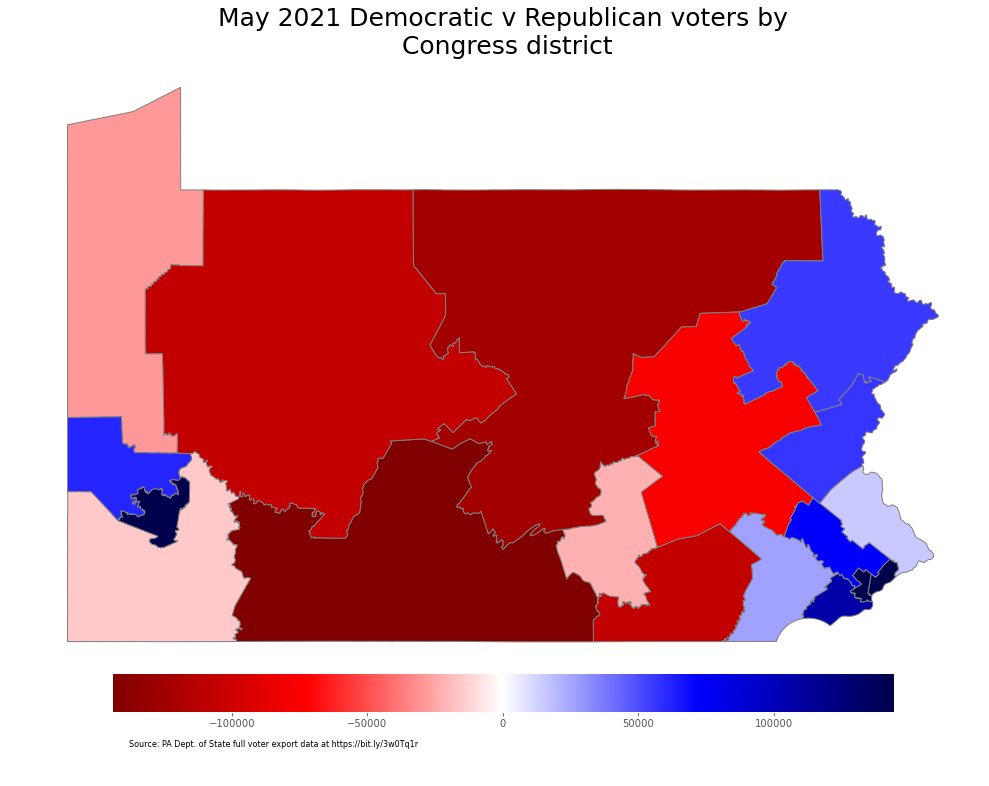

In [24]:
variable='dvr21'
x1=mergemap21[mergemap21.d_type=='Congress'].dvr21.min()
x2=abs(mergemap21[mergemap21.d_type=='Congress'].dvr21.min())
vmin=x1
vmax=x2
colormap1='seismic_r'
#colormap1=colors.ListedColormap(['maroon','darkred','firebrick','red','crimson','mediumslateblue','indigo','blue','darkblue','midnightblue'])
#colormap1=colors.ListedColormap(['#FE0000','#FC0202','#DA170A','#DE191E','#DE1190','#45319D','#154FCA','#0555FF','#0567FF'])
fig, ax = plt.subplots(1,figsize=(18,12))
ax.axis("off")
ax.set_title("May 2021 Democratic v Republican voters by\n Congress district", fontsize=25,color='black')
ax.annotate("Source: PA Dept. of State full voter export data at https://bit.ly/3w0Tq1r",
            xy=(0.13,.05),xycoords='figure fraction',fontsize=8,color='black')
#gdf2.apply(lambda x: ax.annotate(s=x.county_name, xy=x.geometry.centroid.coords[0], ha='center',color='#817F7F',fontsize=10),axis=1);
sm = plt.cm.ScalarMappable(cmap=colormap1,
                          norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
fig.colorbar(sm, orientation='horizontal',fraction=0.06,pad=.005,aspect=20,)
mergemap21[mergemap21.d_type=='Congress'].plot(column=variable, cmap=colormap1,vmin=vmin,vmax=vmax,linewidth=1.0,ax=ax,edgecolor='grey')

<AxesSubplot:title={'center':'Current Democratic v Republican voters by\n Congress district'}>

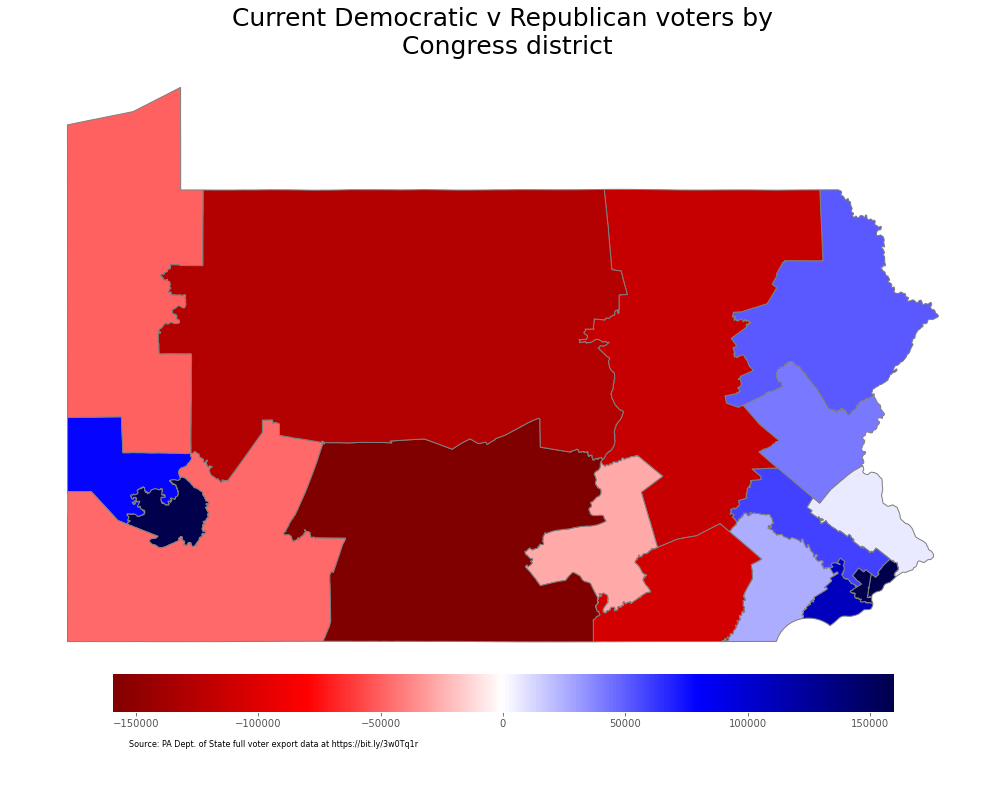

In [25]:
variable='dvr22'
x1=mergemap22[mergemap22.d_type=='Congress'].dvr22.min()
x2=abs(mergemap22[mergemap22.d_type=='Congress'].dvr22.min())
vmin=x1
vmax=x2
colormap1='seismic_r'
#colormap1=colors.ListedColormap(['maroon','darkred','firebrick','red','crimson','mediumslateblue','indigo','blue','darkblue','midnightblue'])
#colormap1=colors.ListedColormap(['#FE0000','#FC0202','#DA170A','#DE191E','#DE1190','#45319D','#154FCA','#0555FF','#0567FF'])
fig, ax = plt.subplots(1,figsize=(18,12))
ax.axis("off")
ax.set_title("Current Democratic v Republican voters by\n Congress district", fontsize=25,color='black')
ax.annotate("Source: PA Dept. of State full voter export data at https://bit.ly/3w0Tq1r",
            xy=(0.13,.05),xycoords='figure fraction',fontsize=8,color='black')
#gdf2.apply(lambda x: ax.annotate(s=x.county_name, xy=x.geometry.centroid.coords[0], ha='center',color='#817F7F',fontsize=10),axis=1);
sm = plt.cm.ScalarMappable(cmap=colormap1,
                          norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
fig.colorbar(sm, orientation='horizontal',fraction=0.06,pad=.005,aspect=20,)
mergemap22[mergemap22.d_type=='Congress'].plot(column=variable, cmap=colormap1,vmin=vmin,vmax=vmax,linewidth=1.0,ax=ax,edgecolor='grey')

<AxesSubplot:title={'center':'May 2021 Democratic v Republican voters by\n state House district'}>

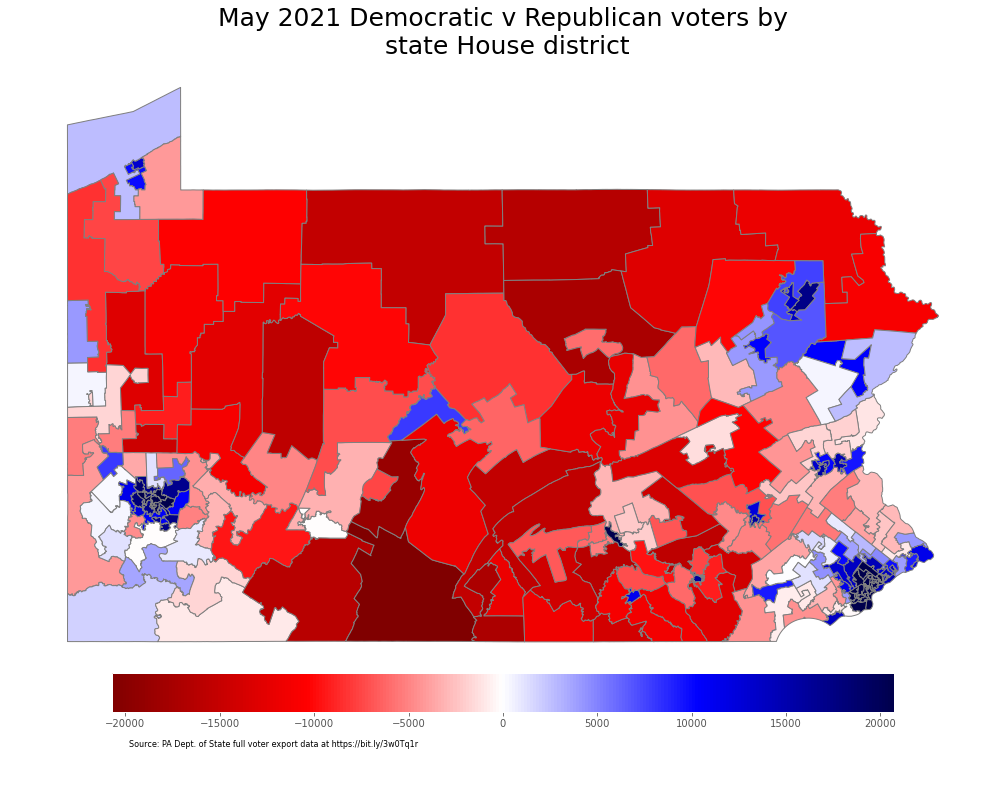

In [26]:
variable='dvr21'
x1=mergemap21[mergemap21.d_type=='State House'].dvr21.min()
x2=abs(mergemap21[mergemap21.d_type=='State House'].dvr21.min())
vmin=x1
vmax=x2
colormap1='seismic_r'
#colormap1=colors.ListedColormap(['maroon','darkred','firebrick','red','crimson','mediumslateblue','indigo','blue','darkblue','midnightblue'])
#colormap1=colors.ListedColormap(['#FE0000','#FC0202','#DA170A','#DE191E','#DE1190','#45319D','#154FCA','#0555FF','#0567FF'])
fig, ax = plt.subplots(1,figsize=(18,12))
ax.axis("off")
ax.set_title("May 2021 Democratic v Republican voters by\n state House district", fontsize=25,color='black')
ax.annotate("Source: PA Dept. of State full voter export data at https://bit.ly/3w0Tq1r",
            xy=(0.13,.05),xycoords='figure fraction',fontsize=8,color='black')
#gdf2.apply(lambda x: ax.annotate(s=x.county_name, xy=x.geometry.centroid.coords[0], ha='center',color='#817F7F',fontsize=10),axis=1);
sm = plt.cm.ScalarMappable(cmap=colormap1,
                          norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
fig.colorbar(sm, orientation='horizontal',fraction=0.06,pad=.005,aspect=20,)
mergemap21[mergemap21.d_type=='State House'].plot(column=variable, cmap=colormap1,vmin=vmin,vmax=vmax,linewidth=1.0,ax=ax,edgecolor='grey')

<AxesSubplot:title={'center':'Current Democratic v Republican voters by\n state House district'}>

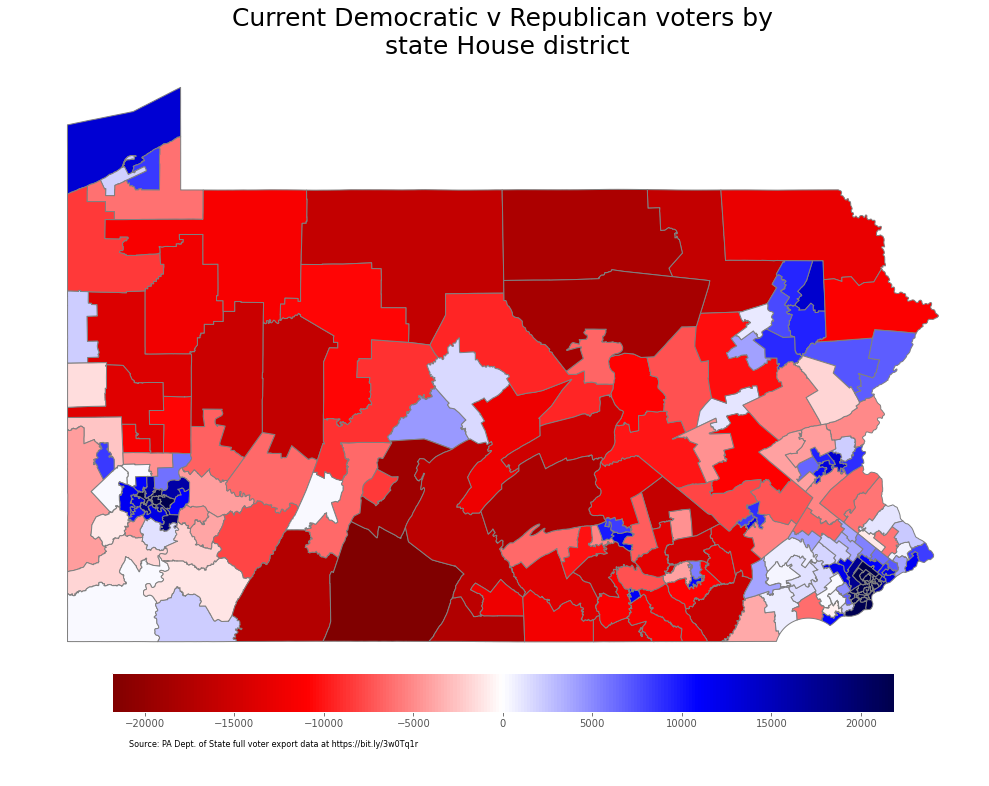

In [27]:
variable='dvr22'
x1=mergemap22[mergemap22.d_type=='State House'].dvr22.min()
x2=abs(mergemap22[mergemap22.d_type=='State House'].dvr22.min())
vmin=x1
vmax=x2
colormap1='seismic_r'
#colormap1=colors.ListedColormap(['maroon','darkred','firebrick','red','crimson','mediumslateblue','indigo','blue','darkblue','midnightblue'])
#colormap1=colors.ListedColormap(['#FE0000','#FC0202','#DA170A','#DE191E','#DE1190','#45319D','#154FCA','#0555FF','#0567FF'])
fig, ax = plt.subplots(1,figsize=(18,12))
ax.axis("off")
ax.set_title("Current Democratic v Republican voters by\n state House district", fontsize=25,color='black')
ax.annotate("Source: PA Dept. of State full voter export data at https://bit.ly/3w0Tq1r",
            xy=(0.13,.05),xycoords='figure fraction',fontsize=8,color='black')
#gdf2.apply(lambda x: ax.annotate(s=x.county_name, xy=x.geometry.centroid.coords[0], ha='center',color='#817F7F',fontsize=10),axis=1);
sm = plt.cm.ScalarMappable(cmap=colormap1,
                          norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
fig.colorbar(sm, orientation='horizontal',fraction=0.06,pad=.005,aspect=20,)
mergemap22[mergemap22.d_type=='State House'].plot(column=variable, cmap=colormap1,vmin=vmin,vmax=vmax,linewidth=1.0,ax=ax,edgecolor='grey')

<AxesSubplot:title={'center':'May 2021 Democratic v Republican voters by\n state Senate district'}>

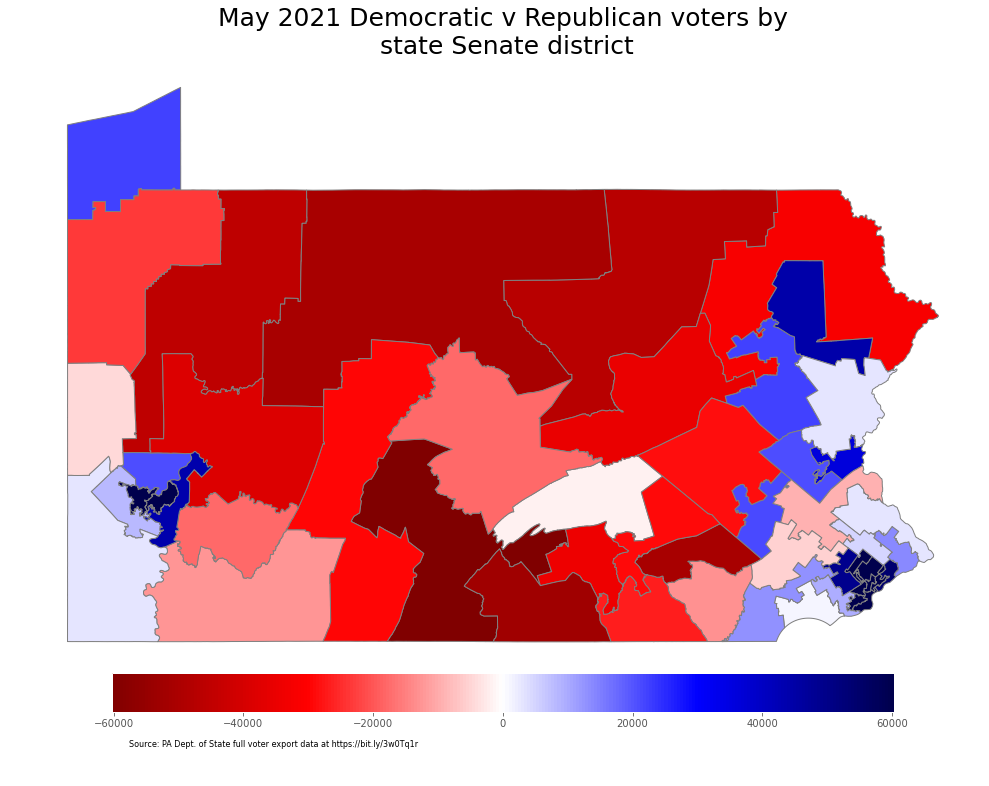

In [28]:
variable='dvr21'
x1=mergemap21[mergemap21.d_type=='State Senate'].dvr21.min()
x2=abs(mergemap21[mergemap21.d_type=='State Senate'].dvr21.min())
vmin=x1
vmax=x2
colormap1='seismic_r'
#colormap1=colors.ListedColormap(['maroon','darkred','firebrick','red','crimson','mediumslateblue','indigo','blue','darkblue','midnightblue'])
#colormap1=colors.ListedColormap(['#FE0000','#FC0202','#DA170A','#DE191E','#DE1190','#45319D','#154FCA','#0555FF','#0567FF'])
fig, ax = plt.subplots(1,figsize=(18,12))
ax.axis("off")
ax.set_title("May 2021 Democratic v Republican voters by\n state Senate district", fontsize=25,color='black')
ax.annotate("Source: PA Dept. of State full voter export data at https://bit.ly/3w0Tq1r",
            xy=(0.13,.05),xycoords='figure fraction',fontsize=8,color='black')
#gdf2.apply(lambda x: ax.annotate(s=x.county_name, xy=x.geometry.centroid.coords[0], ha='center',color='#817F7F',fontsize=10),axis=1);
sm = plt.cm.ScalarMappable(cmap=colormap1,
                          norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
fig.colorbar(sm, orientation='horizontal',fraction=0.06,pad=.005,aspect=20,)
mergemap21[mergemap21.d_type=='State Senate'].plot(column=variable, cmap=colormap1,vmin=vmin,vmax=vmax,linewidth=1.0,ax=ax,edgecolor='grey')

<AxesSubplot:title={'center':'Current Democratic v Republican voters by\n state Senate district'}>

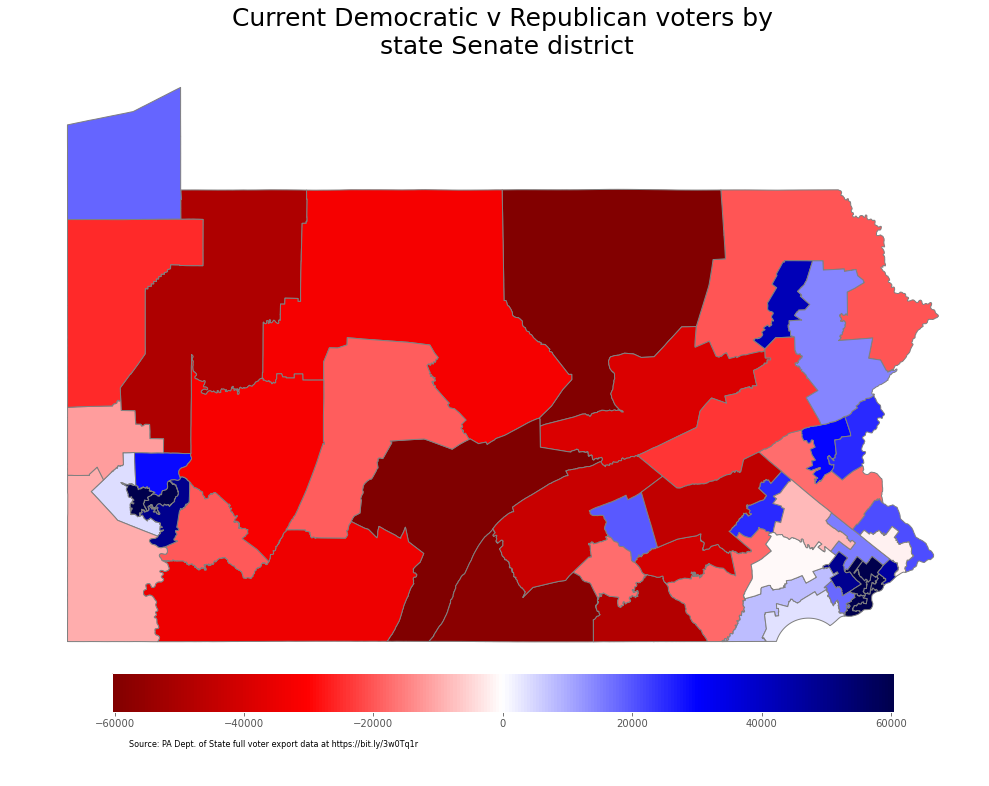

In [29]:
variable='dvr22'
x1=mergemap22[mergemap22.d_type=='State Senate'].dvr22.min()
x2=abs(mergemap22[mergemap22.d_type=='State Senate'].dvr22.min())
vmin=x1
vmax=x2
colormap1='seismic_r'
#colormap1=colors.ListedColormap(['maroon','darkred','firebrick','red','crimson','mediumslateblue','indigo','blue','darkblue','midnightblue'])
#colormap1=colors.ListedColormap(['#FE0000','#FC0202','#DA170A','#DE191E','#DE1190','#45319D','#154FCA','#0555FF','#0567FF'])
fig, ax = plt.subplots(1,figsize=(18,12))
ax.axis("off")
ax.set_title("Current Democratic v Republican voters by\n state Senate district", fontsize=25,color='black')
ax.annotate("Source: PA Dept. of State full voter export data at https://bit.ly/3w0Tq1r",
            xy=(0.13,.05),xycoords='figure fraction',fontsize=8,color='black')
#gdf2.apply(lambda x: ax.annotate(s=x.county_name, xy=x.geometry.centroid.coords[0], ha='center',color='#817F7F',fontsize=10),axis=1);
sm = plt.cm.ScalarMappable(cmap=colormap1,
                          norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
fig.colorbar(sm, orientation='horizontal',fraction=0.06,pad=.005,aspect=20,)
mergemap22[mergemap22.d_type=='State Senate'].plot(column=variable, cmap=colormap1,vmin=vmin,vmax=vmax,linewidth=1.0,ax=ax,edgecolor='grey')

In [30]:
merge22[merge22.d_type=='State Senate'].sort_values(by='dvr22')

,district,voter_22,Rvoter_22,Dvoter_22,oth22,dvr22,part_control22,v_up_down,d_up_down,r_up_down,oth_up_down,party_switch,d_type
30,STS30,154895.0,98779.0,38315.0,17801.0,-60464.0,GOP,-1133.0,184.0,302.0,-1619.0,False,State Senate
23,STS23,173988.0,104876.0,45027.0,24085.0,-59849.0,GOP,25235.0,4481.0,17185.0,3569.0,False,State Senate
33,STS33,169351.0,100755.0,42807.0,25789.0,-57948.0,GOP,-9439.0,-6120.0,-851.0,-2468.0,False,State Senate
21,STS21,167662.0,97330.0,48114.0,22218.0,-49216.0,GOP,-11166.0,-5955.0,-2112.0,-3099.0,False,State Senate
28,STS28,192689.0,104884.0,56909.0,30896.0,-47975.0,GOP,11569.0,-5482.0,15834.0,1217.0,False,State Senate
48,STS48,169611.0,94498.0,49410.0,25703.0,-45088.0,GOP,-4489.0,-9488.0,6507.0,-1508.0,False,State Senate
34,STS34,184085.0,99160.0,56137.0,28788.0,-43023.0,GOP,28208.0,-802.0,24369.0,4641.0,False,State Senate
36,STS36,178365.0,94872.0,54705.0,28788.0,-40167.0,GOP,4163.0,6523.0,-3884.0,1524.0,False,State Senate
27,STS27,164919.0,90461.0,51436.0,23022.0,-39025.0,GOP,12969.0,3799.0,7470.0,1700.0,False,State Senate
32,STS32,162809.0,90507.0,56065.0,16237.0,-34442.0,GOP,10506.0,-6094.0,15729.0,871.0,False,State Senate


In [32]:
mergemap22

,district,geometry,voter_22,Rvoter_22,Dvoter_22,oth22,dvr22,part_control22,v_up_down,d_up_down,r_up_down,oth_up_down,party_switch,d_type
0,USC02,"POLYGON ((-74.97398 40.04859, -74.97743 40.045...",447005.0,72611.0,311730.0,62664.0,239119.0,Dem,19389.0,9818.0,4026.0,5545.0,False,Congress
1,USC08,"POLYGON ((-75.33468 41.97021, -75.33425 41.970...",500387.0,186631.0,238279.0,75477.0,51648.0,Dem,18748.0,4809.0,8655.0,5284.0,False,Congress
2,USC07,"POLYGON ((-75.58984 40.48466, -75.59184 40.485...",514037.0,188504.0,230033.0,95500.0,41529.0,Dem,16844.0,-1015.0,14617.0,3242.0,False,Congress
3,USC03,"POLYGON ((-75.22066 40.00394, -75.21923 40.004...",553913.0,38502.0,449514.0,65897.0,411012.0,Dem,3297.0,190.0,2235.0,872.0,False,Congress
4,USC01,"POLYGON ((-75.19680 40.60858, -75.19671 40.608...",556706.0,228336.0,234966.0,93404.0,6630.0,Dem,22832.0,4801.0,13723.0,4308.0,False,Congress
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,STS50,"POLYGON ((-79.76131 41.85091, -79.75964 41.850...",169754.0,86692.0,61585.0,21477.0,-25107.0,GOP,20966.0,8594.0,10200.0,2172.0,False,State Senate
266,STS06,"POLYGON ((-75.21413 40.25742, -75.21392 40.257...",194511.0,83097.0,81517.0,29897.0,-1580.0,GOP,10684.0,-3184.0,12251.0,1617.0,True,State Senate
267,STS07,"POLYGON ((-75.18332 39.96437, -75.18324 39.964...",188131.0,18940.0,145840.0,23351.0,126900.0,Dem,3959.0,6969.0,-3692.0,682.0,False,State Senate
268,STS08,"POLYGON ((-75.25129 39.90440, -75.25179 39.903...",177337.0,19298.0,137832.0,20207.0,118534.0,Dem,2501.0,-2264.0,3750.0,1015.0,False,State Senate
